# Examen del Primer Parcial

In [311]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import random
import copy

objective = lambda x, y : x**2.0 + y**2.0 #función
r_min, r_max = -5.0, 5.0 #intervalos
acc = 20 #precisión (número de bits por cromosoma)
p_size = 50 #tamaño de la población
m_rate = 0.2 #tasa de mutación 0 - 1
c_rate = 0.9 #tasa de cruce
generations = 20 #generaciones
search = False #buscar False = mínimo, True = máximo


Se muestra la función

C:\Users\villa\AppData\Local\Temp\ipykernel_12892\3383112475.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


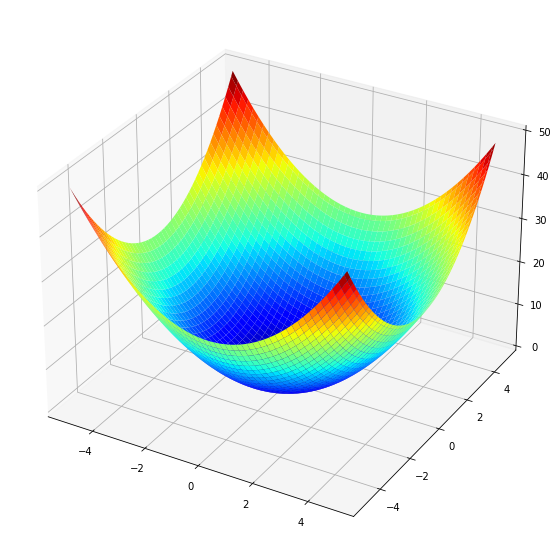

In [312]:
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
x, y = np.meshgrid(xaxis, yaxis)
results = objective(x, y)
figure = plt.figure()
figure.set_size_inches((10, 10))
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
plt.show()

Se generan los primeros individuos

In [313]:
chromosomes = []
for _ in range(50):
    chromosomes.append([np.random.randint(0,2,acc), np.random.randint(0,2,acc)]) #chromosomes[el número del cromosomas][0 = x, 1 = y]
chromosomes = np.array(chromosomes)

Función de evaluación

In [314]:
def bool2int(x):
    x = x[::-1]
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

def ch2dec(ch):
    interval = (abs(r_min - r_max)) / (2 ** acc - 1)
    return r_min + interval * bool2int(ch)

def evaluate(c_x, c_y):
    x, y = ch2dec(c_x), ch2dec(c_y)
    return objective(x, y)

evaluations = []
for i in range(p_size):
    e = evaluate(chromosomes[i][0], chromosomes[i][1])
    evaluations.append(e)
evaluations = np.array(evaluations)

Función de selección

In [315]:
def select(evaluations = evaluations):
    if(not search):
        aux = np.max(evaluations) - evaluations
        evaluations = aux
    rand = random.random() * np.sum(evaluations)
    sum = 0
    for i in range(p_size):
        sum += evaluations[i]
        if(rand <= sum):
            return chromosomes[i]

Función de Cruzamiento

In [316]:
def cross(ch1, ch2):
    if(random.random() < c_rate):
        p1, p2 = ch1, ch2
        
            
        h_p1, h_p2 = [], []
        temp = []

        h_p1.append(random.choices(p1[0], k=20))
        h_p1.append(random.choices(p1[1], k=20))

        for i in h_p1:
            for j in i:
                temp.append(int(not(j)))
            h_p2.append(temp)
            temp = []

        h_p1 = np.array(h_p1)
        h_p2 = np.array(h_p2)
        h_p2 = np.logical_not(h_p2)

        for i in h_p2:
            temp.append(i*1)
            
        h_p2 = temp


        
        return h_p1, h_p2 # Aquí va el cruzamiento
    else:
        return ch1, ch2

cross(select(), select())

(array([[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]]),
 [array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]),
  array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])])

Función de Mutación

In [317]:
def mutate(ch):
    if(random.random() < m_rate):
        positiion = random.randint(0, acc - 1)
        axis = random.randint(0, 1)
        ch[axis][positiion] = not ch[axis][positiion]
    return ch

Algoritmo Genético

In [318]:
for _ in range(generations):
    new_chs = []
    for _ in range(int(p_size/2)):
        ch1, ch2 = select(), select()
        ch1, ch2 = cross(ch1, ch2)
        ch1, ch2 = mutate(ch1), mutate(ch2)
        new_chs.append(ch1)
        new_chs.append(ch2)
    chromosomes = new_chs

#### Resultado

C:\Users\villa\AppData\Local\Temp\ipykernel_12892\1581555084.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


1.3020098705385879
-5.0
26.695229702979912
1.3020098705385879
-5.0
26.695229702979912
2.4640822068044725
-2.18844145626207
10.860977129376849
2.4640822068044725
-2.18844145626207
10.860977129376849
-1.4740814915480533
-2.5493884557613904
8.672297742093981
-1.4740814915480533
-2.5493884557613904
8.672297742093981
3.43593448251198
-4.978523233912691
36.591339358723346
3.43593448251198
-4.978523233912691
36.591339358723346
0.07812984288200653
-5.0
25.006104272348768
-1.8748253582242569
4.365233769639749
22.570235987443965
-4.999961852990964
-5.0
49.99961853136483
-4.999961852990964
-5.0
49.99961853136483
-4.833946069665975
-4.181317502324584
40.85045065968502
-4.833793481629831
-4.181317502324584
40.84897547829294
-4.061268864888063
-5.0
41.49390479290918
-4.061268864888063
-5.0
41.49390479290918
-4.355162959254226
-5.0
43.96744440166003
-4.355162959254226
-5.0
43.96744440166003
-5.0
3.1271821281262664
34.779268062472326
-5.0
3.1271821281262664
34.779268062472326
-5.0
-1.3233912691033067


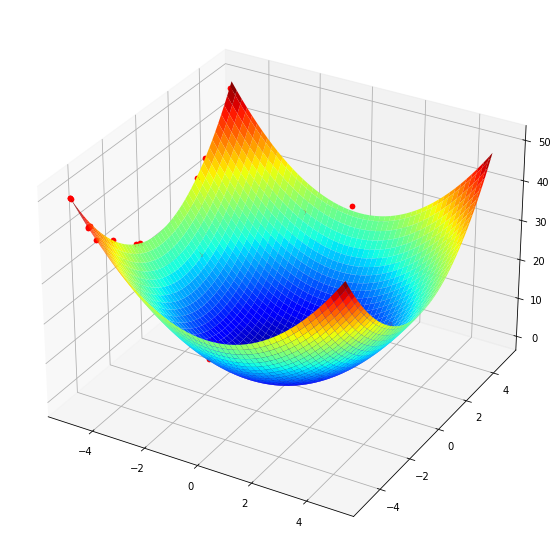

In [319]:
figure = plt.figure()
figure.set_size_inches((10, 10))
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')

for c in chromosomes:
    x0 = ch2dec(c[0])
    y0 = ch2dec(c[1])
    z0 = evaluate(c[0],c[1])
 
    axis.scatter(x0, y0, z0, c='r')


plt.show()